In [23]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 80
plt.rcParams['figure.figsize'] = (20, 8)
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels
import statistics
import math
import warnings
import itertools
from statsmodels.tsa.api import Holt
from scipy.optimize import curve_fit
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings("ignore")

In [24]:
data = pd.read_csv('./flights.csv')
data.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
display(data.value_counts('DIVERTED'))

DIVERTED
0    5803892
1      15187
dtype: int64

In [27]:
display(data.value_counts('CANCELLED'))

CANCELLED
0    5729195
1      89884
dtype: int64

In [12]:
percentage_result = data.isnull().sum()/data.shape[0] * 100

percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "% missing": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

,columns,% missing
0,YEAR,0.000000
1,MONTH,0.000000
2,DAY,0.000000
3,DAY_OF_WEEK,0.000000
4,AIRLINE,0.000000
5,FLIGHT_NUMBER,0.000000
6,TAIL_NUMBER,0.252978
7,ORIGIN_AIRPORT,0.000000
8,DESTINATION_AIRPORT,0.000000
9,SCHEDULED_DEPARTURE,0.000000


In [16]:
df = data[:100000]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

In [17]:
myCols = df.select_dtypes(exclude='object').columns
df[myCols]

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,98,5,2354.0,-11.0,21.0,15.0,...,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,2336,10,2.0,-8.0,12.0,14.0,...,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,840,20,18.0,-2.0,16.0,34.0,...,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,258,20,15.0,-5.0,15.0,30.0,...,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,135,25,24.0,-1.0,11.0,35.0,...,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,1,7,3,4992,1108,1102.0,-6.0,23.0,1125.0,...,1219,1208.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN
99996,2015,1,7,3,394,1108,1117.0,9.0,11.0,1128.0,...,1842,1844.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN
99997,2015,1,7,3,5606,1108,1101.0,-7.0,28.0,1129.0,...,1225,1232.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN
99998,2015,1,7,3,1135,1109,1116.0,7.0,26.0,1142.0,...,1454,1453.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

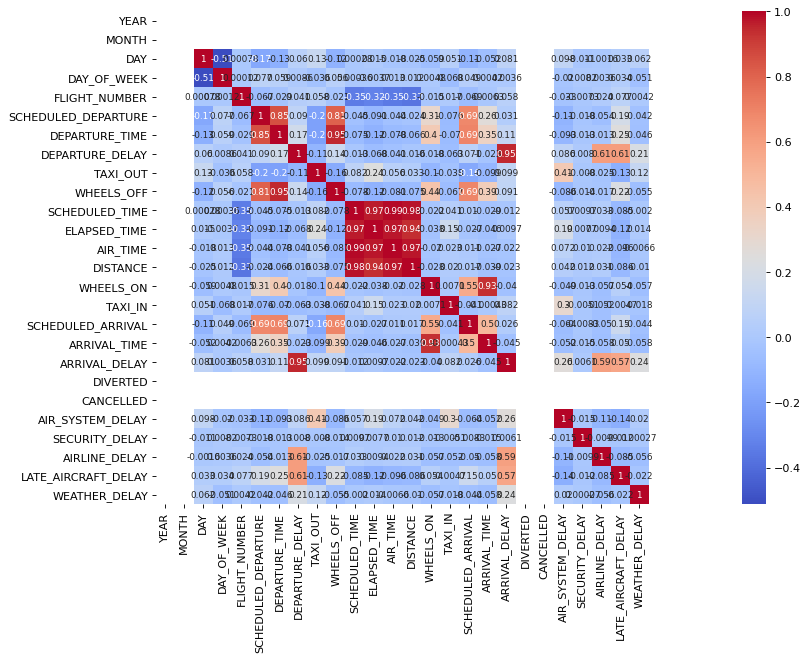

In [21]:
dfa = df[myCols].dropna()
corr1 = dfa.corr()
plt.figure(figsize=(30, 8)) # width and height in inches
sns.heatmap(corr1, square=1, annot=True, annot_kws={'size': 8}, cmap= 'coolwarm')

In [22]:
dfa.value_counts('DIVERTED')

DIVERTED
0    34625
dtype: int64

In [29]:
for col in df.columns:
    #print(df[col].value_counts())
    pd.DataFrame(df[col].value_counts().sort_index()

2015    100000
Name: YEAR, dtype: int64
1    100000
Name: MONTH, dtype: int64
2    16741
5    16548
4    16352
3    15434
6    15315
1    13950
7     5660
Name: DAY, dtype: int64
5    16741
1    16548
7    16352
6    15434
2    15315
4    13950
3     5660
Name: DAY_OF_WEEK, dtype: int64
WN    21160
DL    13156
EV    10810
OO    10475
AA     9449
UA     8413
US     6968
MQ     6305
B6     4688
AS     2836
NK     1813
F9     1563
HA     1328
VX     1036
Name: AIRLINE, dtype: int64
341     79
404     75
403     67
371     66
470     63
        ..
5018     1
3639     1
6068     1
4023     1
3291     1
Name: FLIGHT_NUMBER, Length: 6047, dtype: int64
N476HA    85
N492HA    81
N484HA    79
N481HA    76
N489HA    75
          ..
N643UA     1
N7BRAA     1
N77006     1
N28912     1
N662UA     1
Name: TAIL_NUMBER, Length: 4190, dtype: int64
ATL    6009
DFW    4920
ORD    4878
DEN    3896
LAX    3764
       ... 
ILG       5
GFK       4
OTH       3
ADK       2
PPG       2
Name: ORIGIN_AIRPORT, Leng

In [31]:
df_table = {
    var:pd.DataFrame(df[var].value_counts().sort_index()) for var in df.columns
}
display(df_table)

{'YEAR':         YEAR
 2015  100000,
 'MONTH':     MONTH
 1  100000,
 'DAY':      DAY
 1  13950
 2  16741
 3  15434
 4  16352
 5  16548
 6  15315
 7   5660,
 'DAY_OF_WEEK':    DAY_OF_WEEK
 1        16548
 2        15315
 3         5660
 4        13950
 5        16741
 6        15434
 7        16352,
 'AIRLINE':     AIRLINE
 AA     9449
 AS     2836
 B6     4688
 DL    13156
 EV    10810
 F9     1563
 HA     1328
 MQ     6305
 NK     1813
 OO    10475
 UA     8413
 US     6968
 VX     1036
 WN    21160,
 'FLIGHT_NUMBER':       FLIGHT_NUMBER
 1                41
 2                38
 3                43
 4                43
 5                40
 ...             ...
 7430              6
 7431              6
 7432             12
 7433              3
 7438             12
 
 [6047 rows x 1 columns],
 'TAIL_NUMBER':         TAIL_NUMBER
 N001AA           20
 N002AA           17
 N003AA           17
 N004AA           12
 N005AA           13
 ...             ...
 N997DL           32
 N998AT     

In [32]:
def multi_table(table_list):
    return HTML('<table><tr style="background-color:white;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')
            nunique_df={var:pd.DataFrame(df[var].value_counts().sort_index())
                for var in df.columns

multi_table(df.columns)

IndentationError: unexpected indent (1636727632.py, line 3)

In [33]:
data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')